Author: Judit Lozano Gondolbeu

## Applicación Flask

Para poder llevaar el modelo entrenado en producción, realizaremos una aplicación que permita al usuario indicar las variables de un caso hipotético para que el modelo devuelva una predicción en base a estas variables. En este caso, el modelo devolverá la probabilidad de que sí haya algún fallecimiento.

## Directorio

Creamos una carpeta "app" con dos carpetas dentro llamadas "model" y "templates":

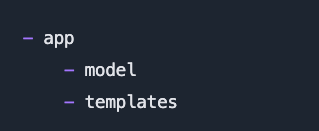

- Movemos en la carpeta "model" el modelo entrenado que hemos guardado anteriormente en formato pickle.

- En la carpeta "templates" creamos un nuevo archivo html llamado index.html.

- Dentro de la carpeta "app" y al mismo nivel que las otras dos carpetas creamos un archivo .py llamado "app.py"

## Código

Para configurar el html y el archivo py usaremos un editor de código. En este trabajo usaremos VSCode.

### app.py
Abrimos el archivo app.py desde el editor y configuramos las librerías que vamos a usar, llamamos el modelo que hemos guardado anteriormente e instanciamos la aplicación flask.

```python
import flask
import pickle
import numpy as np
import pandas as pd
from flask import Flask, request, render_template
import flask_monitoringdashboard as dashboard

with open(f'model/model_flask.pickle', 'rb') as f:
    model = pickle.load(f)


app = Flask(__name__, template_folder='templates')
```

A continuación llamamos a la librería flask_monitoringdashboard (as dashboard) que permite monotorizar la aplicación y el comportamiento de los usuarios. Para acceder a este dashboard, una vez la aplicación está lanzada hay que poner en la barra de dirección del explorador web 'ruta_de_la_aplicación/dashboard'. En nuestro caso http://192.168.1.87/dashboard.

```python
dashboard.bind(app)
```

A continuación, configuramos las dos rutas principales de la aplicación:
- Main: Aquí llamamos al archivo index.html que contine el formulario que el usuario tiene que completar para que la aplicación devuelva la predicción.
- Predict: Aquí preparamos los datos introducidos por el usuario y se transforman en un dataframe con el mismo numero y orden de columnas que el modelo espera recibir. El modelo se encarga de la codificación de las variables internamente ya que contine el pipeline con los pasos necesarios para el preprocesamiento de las variables antes de realizar la predicción.

```python
@app.route('/',methods=['GET'])
def main():
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [int(x) for x in request.form.values()]
    final = np.array(int_features)
    data_unseen = pd.DataFrame([final], columns = ['C_MNTH', 'C_WDAY', 
    'C_HOUR', 'C_WTHR', 'C_RALN', 'C_TRAF', 'V_TYPE', 'P_SEX','PP_CAR']).astype(object)      
    prediction = model.predict_proba(data_unseen)[:,1]
    text = str('Dado un accidente, probabilidad de que haya algún fallecido:')

    return render_template('index.html',result=prediction)
```

Finalmente, cerramos la configuración del archivo app.py indicando los puertos que queremos reservar para la applicación Flask y para que pueda funcionar en docker:

```python
if __name__ == '__main__':
    app.run('0.0.0.0', port=80)
```

### index.html
Aquí especificamos los campos que queremos que el usuario seleccione y les asignamos el valor que le corresponde según el diccionario de datos y la codificación que el modelo espera recibir:


```python
  <body>
    <form action="{{ url_for('predict') }}" method="POST">
      <label for="C_MNTH">Mes del año:</label><br />
      <select id="C_MNTH" name="C_MNTH" >
        <option value=1>Enero</option>
        <option value=2>Febrero</option>
        <option value=3>Marzo</option>
        <option value=4>Abril</option>
        <option value=5>Mayo</option>
        <option value=6>Junio</option>
        <option value=7>Julio</option>
        <option value=8>Agosto</option>
        <option value=9>Septiembre</option>
        <option value=10>Octubre</option>
        <option value=11>Noviembre</option>
        <option value=12>Diciembre</option>
        <option value=50>Desconocido</option>
      </select><br/>
      <label for="C_WDAY">Día de la semana:</label><br />
      <select id="C_WDAY" name="C_WDAY" >
        <option value=1>Monday </option>
        <option value=2>Tuesday </option>
        <option value=3>Wednesday </option>
        <option value=4>Thursday </option>
        <option value=5>Friday </option>
        <option value=6>Saturday </option>
        <option value=7>Sunday </option>
        <option value=52 >Desconocido </option>
      </select><br/>
      <label for="C_HOUR">Hora:</label><br />
      <select id="C_HOUR" name="C_HOUR" >
        <option value=0>Midnight to  0:59 </option>
        <option value=1> 1:00 to  1:59 </option>
        <option value=2> 2:00 to  2:59 </option>
        <option value=3> 3:00 to  3:59 </option>
        <option value=4> 4:00 to  4:59 </option>
        <option value=5> 5:00 to  5:59 </option>
        <option value=6> 6:00 to  6:59 </option>
        <option value=7> 7:00 to  7:59 </option>
        <option value=8> 8:00 to  8:59 </option>
        <option value=9> 9:00 to  9:59 </option>
        <option value=10>10:00 to 10:59 </option>
        <option value=11>11:00 to 11:59 </option>
        <option value=12>12:00 to 12:59 </option>
        <option value=13>13:00 to 13:59 </option>
        <option value=14>14:00 to 14:59 </option>
        <option value=15>15:00 to 15:59 </option>
        <option value=16>16:00 to 16:59 </option>
        <option value=17>17:00 to 17:59 </option>
        <option value=18>18:00 to 18:59 </option>
        <option value=19>19:00 to 19:59 </option>
        <option value=20>20:00 to 20:59 </option>
        <option value=21>21:00 to 21:59 </option>
        <option value=22>22:00 to 22:59 </option>
        <option value=23>23:00 to 23:59 </option>
        <option value=50>Desconocido</option>
      </select><br/>
      <label for="C_WTHR">Condiciones metereológicas:</label><br />
      <select id="C_WTHR" name="C_WTHR" >
        <option value=1>Clear and sunny </option>
        <option value=2>Overcast, cloudy but no precipitation </option>
        <option value=3>Raining </option>
        <option value=4>Snowing, not including drifting snow </option>
        <option value=5>Freezing rain, sleet, hail </option>
        <option value=6>Visibility limitation  e.g. drifting snow, fog, smog, dust, smoke, mist </option>
        <option value=7>Strong wind </option>
        <option value=52>Ninguna de las anteriores</option>
        <option value=55>Desconocido</option>
      </select><br/>
      <label for="C_RALN">Tipo de carretera:</label><br />
      <select id="C_RALN" name="C_RALN" >
        <option value=1>Straight and level </option>
        <option value=2>Straight with gradient </option>
        <option value=3>Curved and level </option>
        <option value=4>Curved with gradient </option>
        <option value=5>Top of hill or gradient </option>
        <option value=6>Bottom of hill or gradient  "Sag" </option>
        <option value=52>Ninguna de las anteriores</option>
        <option value=55>Desconocido</option>
      </select><br/>
      <label for="C_TRAF">Tipo de controles de tráfico:</label><br />
      <select id="C_TRAF" name="C_TRAF" >
        <option value=1>Traffic signals fully operational </option>
        <option value=2>Traffic signals in flashing mode </option>
        <option value=3>Stop sign </option>
        <option value=4>Yield sign </option>
        <option value=5>Warning sign </option>
        <option value=6>Pedestrian crosswalk </option>
        <option value=7>Police officer </option>
        <option value=8>School guard, flagman </option>
        <option value=9>School crossing </option>
        <option value=10>Reduced speed zone </option>
        <option value=11>No passing zone sign </option>
        <option value=12>Markings on the road </option>
        <option value=13>School bus stopped with school bus signal lights flashing </option>
        <option value=14>School bus stopped with school bus signal lights not flashing </option>
        <option value=15>Railway crossing with signals, or signals and gates </option>
        <option value=16>Railway crossing with signs only </option>
        <option value=17>Control device not specified </option>
        <option value=18>No control present </option>
        <option value=50>Ninguna de las anteriores</option>
        <option value=56>Desconocido</option>
      </select><br/>
      <label for="V_TYPE">Tipo de vehículo:</label><br />
      <select id="V_TYPE" name="V_TYPE" >
        <option value=1>Light Duty Vehicle (Passenger car, Passenger van, Light utility vehicles and light duty pick up trucks) </option>
        <option value=5>Panel/cargo van </option>
        <option value=6>Other trucks and vans </option>
        <option value=7>Unit trucks > 4536 KG </option>
        <option value=8>Road tractor </option>
        <option value=9>School bus </option>
        <option value=10>Smaller school bus </option>
        <option value=11>Urban and Intercity Bus </option>
        <option value=14>Motorcycle and moped </option>
        <option value=16>Off road vehicles </option>
        <option value=17>Bicycle </option>
        <option value=18>Purpose-built motorhome </option>
        <option value=19>Farm equipment </option>
        <option value=20>Construction equipment </option>
        <option value=21>Fire engine </option>
        <option value=22>Snowmobile </option>
        <option value=23>Street car </option>
        <option value=50>Data element is not applicable </option>
        <option value=56>Ninguna de las anteriores</option>
        <option value=54>Desconocido</option>
      </select><br/>
      <label for="P_SEX">Sexo:</label><br />
      <select id="P_SEX" name="P_SEX" >
        <option value=0 >Female </option>
        <option value=1 >Male </option>
        <option value=9>Data element is not applicable</option>
        <option value=8>Desconocido</option>
      </select><br/>
      <label for="PP_CAR">Número de ocupantes:</label><br />
      <select id="PP_CAR" name="PP_CAR" >
        <option value=1>Una única persona (solo el conductoor)</option>
        <option value=2>Dos Personas (Incluyendo al conductor)</option>
        <option value=3>Más de dos personas</option>
      </select><br/>
      <input type="submit" value="Submit" />
    </form>
    <br />
    {% if result %}
    <p>Dado un accidente, la probabilidad de que haya algún fallecido es:
    <span style="color: orange">{{result}}</span>
    </p>
    {% endif %}
  </body>

```

En el último apartado hemos incluido una condicional {% if result %} que muestra los resultados y el texto que acompaña los resultados solo cuando el servidor los tiene, es decir una vez que la predición es generada desde el archivo app.py.

### Resultado Final

Una vez hemos configurado los archivos mencionados anteriormente, para lanzar la aplicación ejecutamos desde el directorio donde se encuentra la aplicación en el terminal:

In [5]:
# python app.py

Si todo se ha configurado correctamente, el terminal muestra un mensaje como el siguiente y podemos ejecutar desde el navegador web la dirección http://192.168.1.87:80/

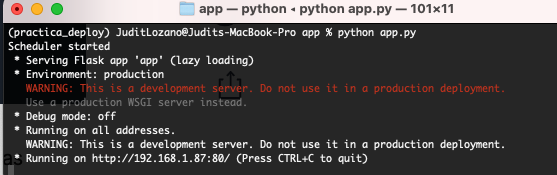

### Ventana principal de la aplicación:

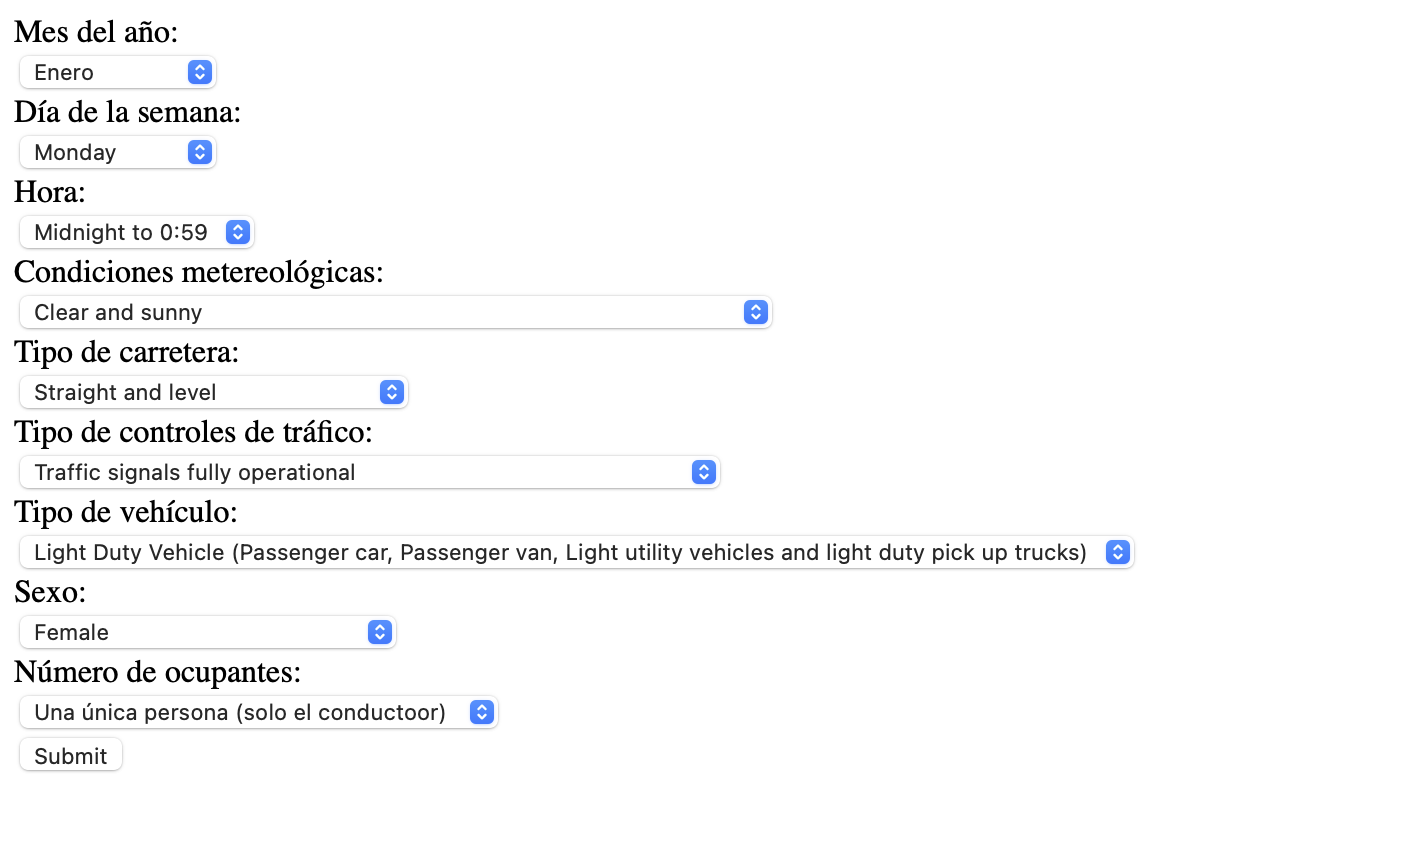

### Ejemplo de predicción una vez hacemos click en Submit
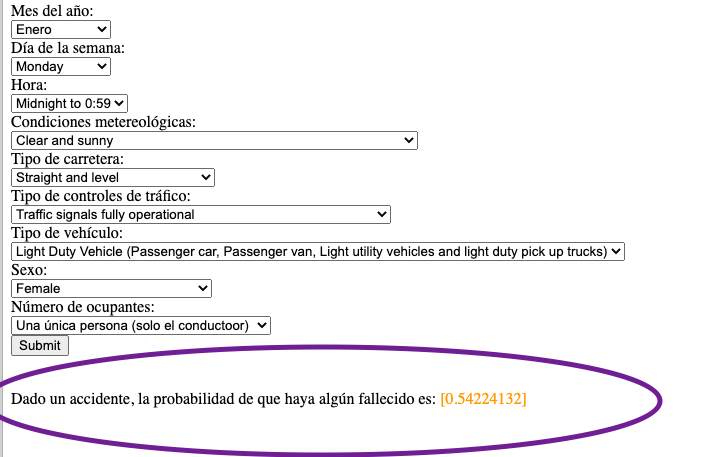

### Acceso al Dashboard para monitorizar la aplicacion:

Desde el mismo explorador escribimos: http://192.168.1.87/dashboard

El nombre de usuario y contraseña es 'admin' para ambos campos.

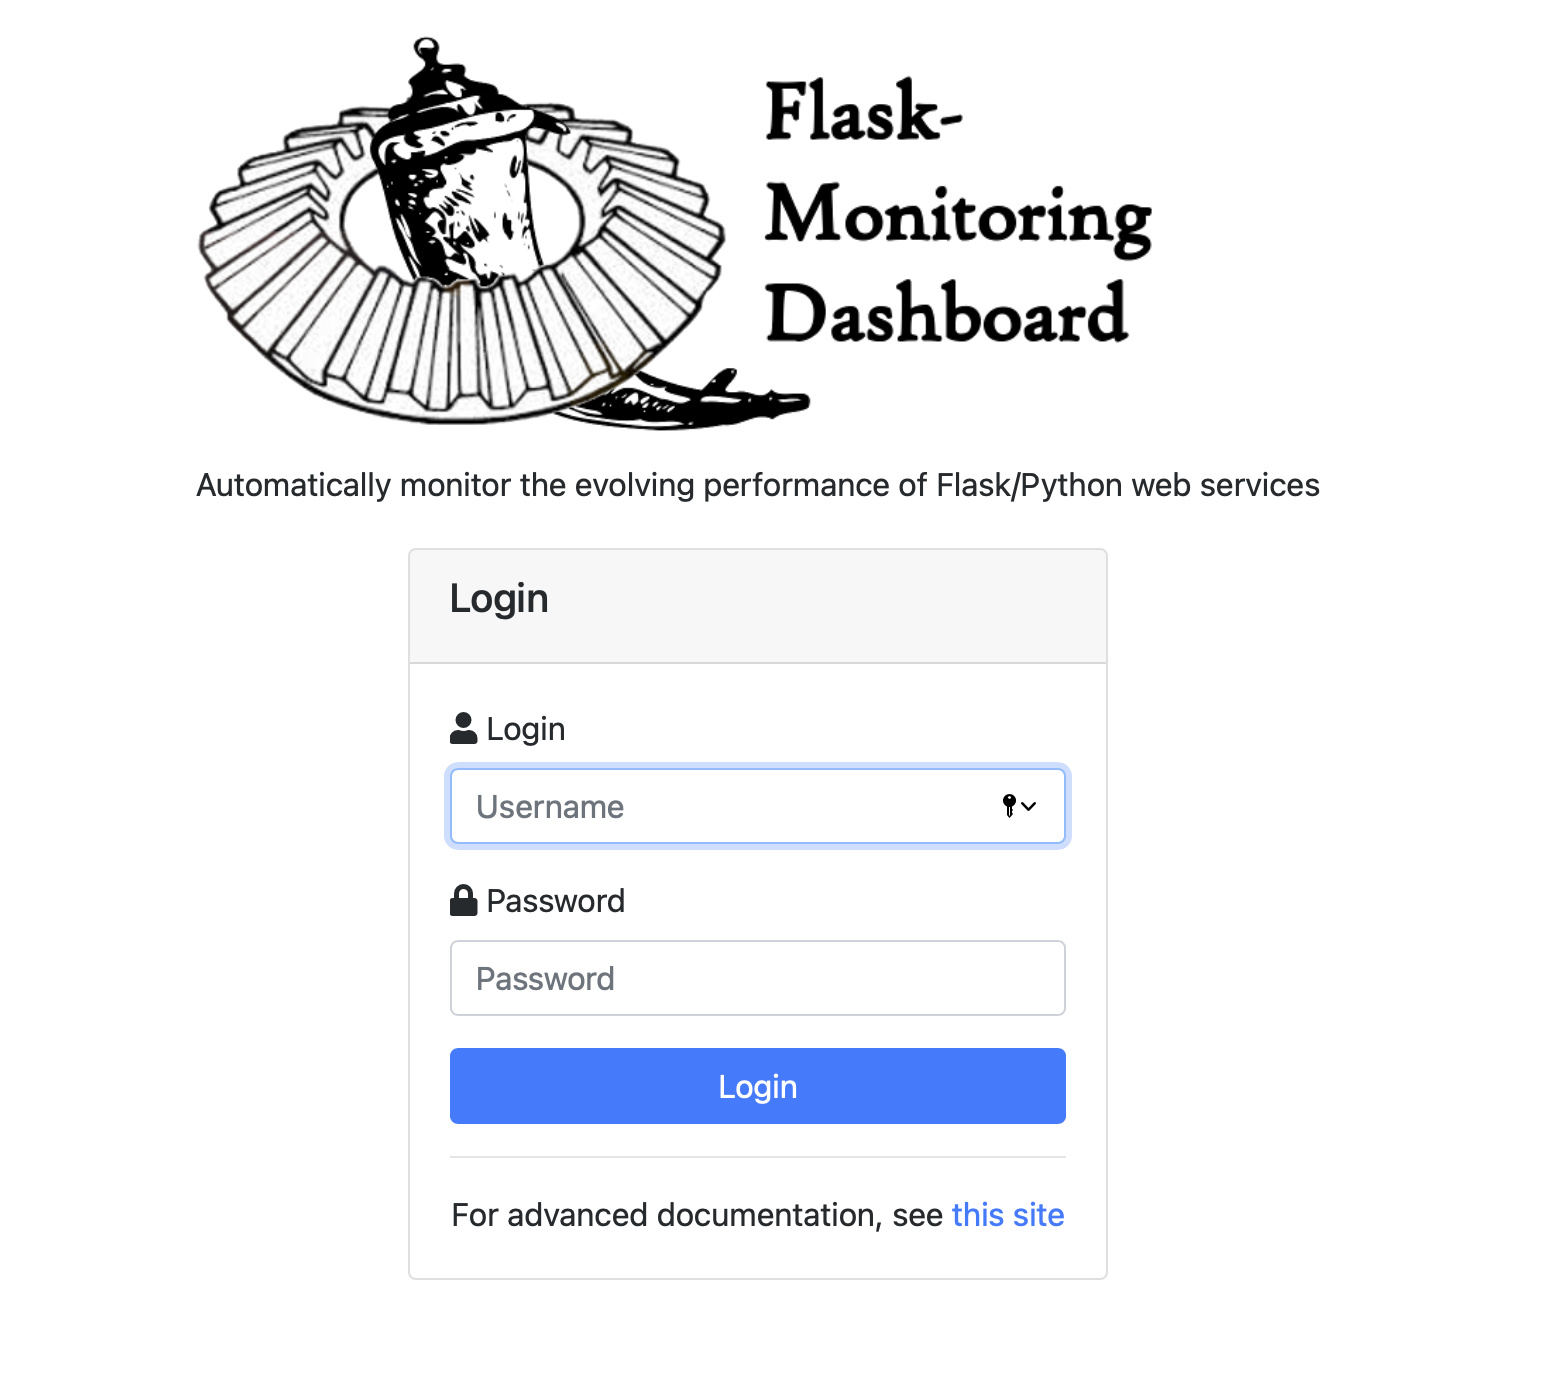

Una opción para expandir este proyecto es la incorporación de gráficos customizados al dashboard. Más informacións sobre esta opción se encuentra en los enlaces siguentes.

### Referencias

https://flask-monitoringdashboard.readthedocs.io/en/latest/

https://medium.com/flask-monitoringdashboard-turtorial/monitor-your-flask-web-application-automatically-with-flask-monitoring-dashboard-d8990676ce83#24d7